In [1]:
import matplotlib.pyplot as plt

from scipy.special import logit,expit

import tree_braider as trbr
import tree_reader as trr
import lumberjack

import numpy as np

In [2]:
r1 = {}

r1['feature'] = '0'
r1['split'] = 1
r1['features'] = ['1']
r1['samples'] = ['0','1','2']
r1['medians'] = [0]
r1['dispersions'] = [0]
r1['local_gains'] = None
r1['absolute_gains'] = None
r1['children'] = []


In [3]:
c1 = {}

c1['feature'] = '0'
c1['split'] = 1
c1['features']= ['1']
c1['samples'] = ['1','2']
c1['medians'] = [0]
c1['dispersions'] = [0]
c1['local_gains'] = None
c1['absolute_gains'] = None
c1['children'] = []

c2 = {}

c2['feature'] = '0'
c2['split'] = 1
c2['features']= ['1']
c2['samples'] = ['0']
c2['medians'] = [0]
c2['dispersions'] = [0]
c2['local_gains'] = None
c2['absolute_gains'] = None
c2['children'] = []


r1['children'] = [c1,c2]


In [4]:
test_counts = np.array([[1],[2],[3]])

test_forest = trr.Forest([r1],test_counts)

In [5]:
test_forest.nodes()

In [6]:
test_forest.truth_dictionary.sample_dictionary

{'0': 0, '1': 1, '2': 2}

In [7]:
test_forest.nodes()[2].index

2

In [8]:
test_forest.nodes()[2].lr_encoding_vectors()

[array([False,  True,  True]), array([ True, False, False])]

In [9]:
iris = np.loadtxt('../testing/iris.trunc')

In [10]:
iris_forest = lumberjack.fit(iris,trees=100,depth=2)

Setting context
Input:(150, 4)
Output:(150, 4)
CHECK TRUTH
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbgrhe6dw
['input.counts', 'output.counts', 'tmp.i.header', 'tmp.o.header']
Generating trees
Running /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1
Command: /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1 generate -ic /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbgrhe6dw/input.counts -oc /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbgrhe6dw/output.counts -o /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbgrhe6dw/tmp -auto -ifh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbgrhe6dw/tmp.i.header -ofh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpbgrhe6dw/tmp.o.header -trees 100 -depth 2
Trying to readline

5.1 0
100
150,4

5.1 0
100
150,4
Automatic parameters:
ss:100
if:4
of:4
p:8
t:100
l:10
d:No
pm:Branch
Reading header: /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/t

In [11]:
iris_forest.nodes()[0].samples

['41',
 '41',
 '47',
 '22',
 '22',
 '3',
 '11',
 '11',
 '30',
 '30',
 '24',
 '9',
 '9',
 '37',
 '25',
 '7',
 '40',
 '40',
 '40',
 '35',
 '35',
 '35']

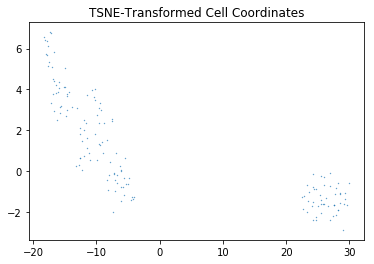

In [12]:
iftc = iris_forest.tsne()

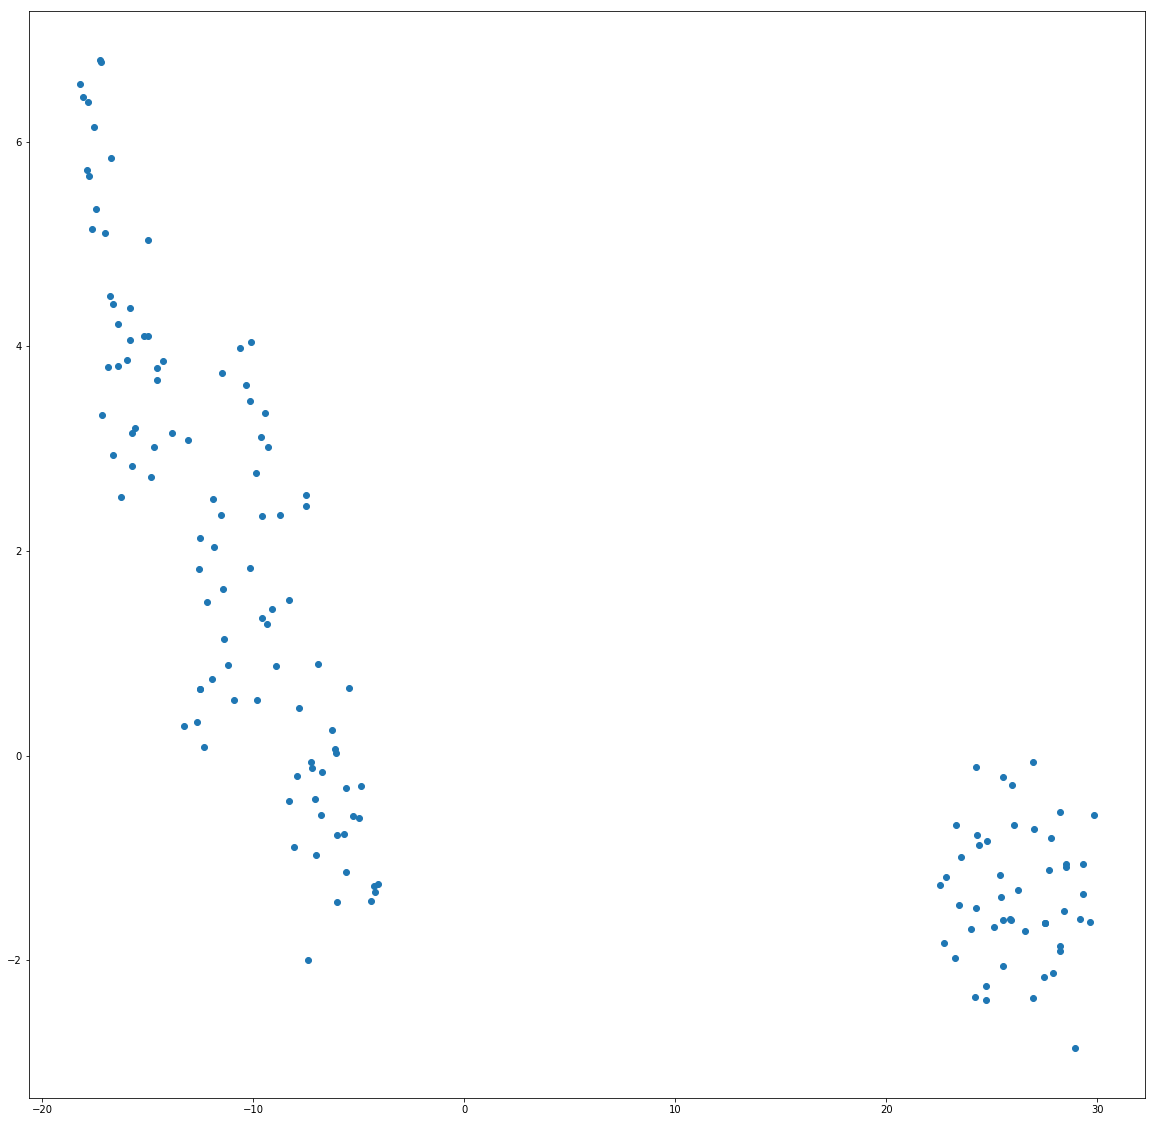

In [13]:
plt.figure(figsize=(20,20))
plt.scatter(iftc[:,0],iftc[:,1])
plt.show()

In [14]:
braids = trbr.IHMM(iris_forest)

INITIAL HIDDEN STATES
[0, 1]
All assignments
[ 0  0  0  0 18  4 14  0  0  0  0 16  4  5  0  0  0  0 19 11  4  0  0  0
  0 18  1  3  0  0  0  0  3  7 14  0  0  0  0  7 12 11  0  0  0  0 12  7
 11  0  0  0  0  3 13 17  0  0  0  0  7 19  6  0  0  0  0  4  8 11  0  0
  0  0  8 15  6  0  0  0  0 18  4 10  0  0  0  0 17 12  9  0  0  0  0  4
 11 15  0  0  0  0  1  1  1  0  0  0  0 16  8 18  0  0  0  0 13  5  8  0
  0  0  0 18  6  6  0  0  0  0 20 14 14  0  0  0  0 14 16 14  0  0  0  0
 20  7 13  0  0  0  0 20  1 10  0  0  0  0  9 12  4  0  0  0  0  4 18 16
  0  0  0  0 17 11 11  0  0  0  0 17 10  9  0  0  0  0  6 14  5  0  0  0
  0 19 14  6  0  0  0  0 13  3  4  0  0  0  0 12 16 13  0  0  0  0  8 14
 11  0  0  0  0 18  4 16  0  0  0  0 20  2 16  0  0  0  0  3 19 18  0  0
  0  0 10 14 14  0  0  0  0 18 20 14  0  0  0  0  3 12 18  0  0  0  0 20
  6  5  0  0  0  0  1 18  6  0  0  0  0 16 13 19  0  0  0  0 14  4 20  0
  0  0  0 19  6  7  0  0  0  0  1  8  4  0  0  0  0 15 17  8  0  0  0  0
  8 10

In [15]:
# print(braids.hidden_states[0].sample_log_odds)
# print(braids.hidden_states[1].sample_log_odds)
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[3].sample_log_odds)
# print(braids.hidden_states[4].sample_log_odds)

In [16]:
# print(braids.hidden_states[0].sample_log_odds)
# print(braids.hidden_states[1].sample_log_odds)
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[3].sample_log_odds)
# print(braids.hidden_states[4].sample_log_odds)
# print(braids.hidden_states[4].node_odds())

In [17]:
[n.hidden_state for n in braids.nodes]

[14,
 5,
 4,
 3,
 14,
 11,
 11,
 17,
 6,
 11,
 6,
 10,
 9,
 15,
 21,
 18,
 8,
 6,
 14,
 14,
 13,
 10,
 4,
 16,
 11,
 9,
 5,
 6,
 4,
 13,
 11,
 16,
 16,
 18,
 14,
 14,
 18,
 5,
 6,
 19,
 20,
 7,
 4,
 8,
 16,
 17,
 6,
 6,
 5,
 7,
 19,
 10,
 18,
 4,
 3,
 17,
 19,
 12,
 12,
 16,
 17,
 13,
 5,
 8,
 12,
 9,
 11,
 18,
 6,
 9,
 14,
 15,
 8,
 4,
 7,
 6,
 7,
 12,
 20,
 7,
 13,
 7,
 14,
 17,
 2,
 19,
 9,
 13,
 15,
 16,
 11,
 9,
 15,
 10,
 21,
 5,
 7,
 2,
 7,
 19,
 18,
 4,
 16,
 4,
 19,
 11,
 18,
 21,
 3,
 7,
 7,
 12,
 12,
 7,
 3,
 13,
 7,
 19,
 4,
 8,
 8,
 15,
 18,
 4,
 17,
 12,
 4,
 11,
 21,
 21,
 16,
 8,
 13,
 5,
 18,
 6,
 20,
 14,
 14,
 16,
 20,
 7,
 20,
 21,
 9,
 12,
 4,
 18,
 17,
 11,
 17,
 10,
 6,
 14,
 19,
 14,
 13,
 3,
 12,
 16,
 8,
 14,
 18,
 4,
 20,
 2,
 3,
 19,
 10,
 14,
 18,
 20,
 3,
 12,
 20,
 6,
 21,
 18,
 16,
 13,
 14,
 4,
 19,
 6,
 21,
 8,
 15,
 17,
 8,
 10,
 3,
 12,
 12,
 16,
 4,
 5,
 13,
 9,
 13,
 10,
 7,
 21,
 19,
 17,
 10,
 20,
 12,
 6,
 16,
 5,
 17,
 21,
 8,
 9,
 4,
 16,
 10,

All assignments
[0 0 0 0 3 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 3 3 2 0 0
 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 3 3 2 0 0 0 0 2 3 2 0 0 0 0
 3 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 3 3
 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 3 3 2 0 0 0 0 3 3 2 0
 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 3 3 2 0 0 0 0 3 3 2 0 0 0 0 2 3 2 0 0 0
 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 3 3 2 0 0 0 0 3
 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2
 0 0 0 0 3 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 3 3 2 0 0 0 0 2 3 2 0 0
 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 3 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0
 2 3 2 0 0 0 0 2 3 2 0 0 0 0 3 3 2 0 0 0 0 3 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3
 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 3 3 2 0 0 0 0 3 3 2 0 0 0 0 2 3 2 0
 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0
 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 3 2 0 0 0 0 2 2 2 0 0 0 0 2 3 2 0 0 0 0 2
 3 2 0 0 

HIDDEN STATES REASSIGNED 2
[0, 1, 2, 3]
HIDDEN STATES MEMORIZED
[0, 1, 2, 3]
All nodes
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3]
All assignme

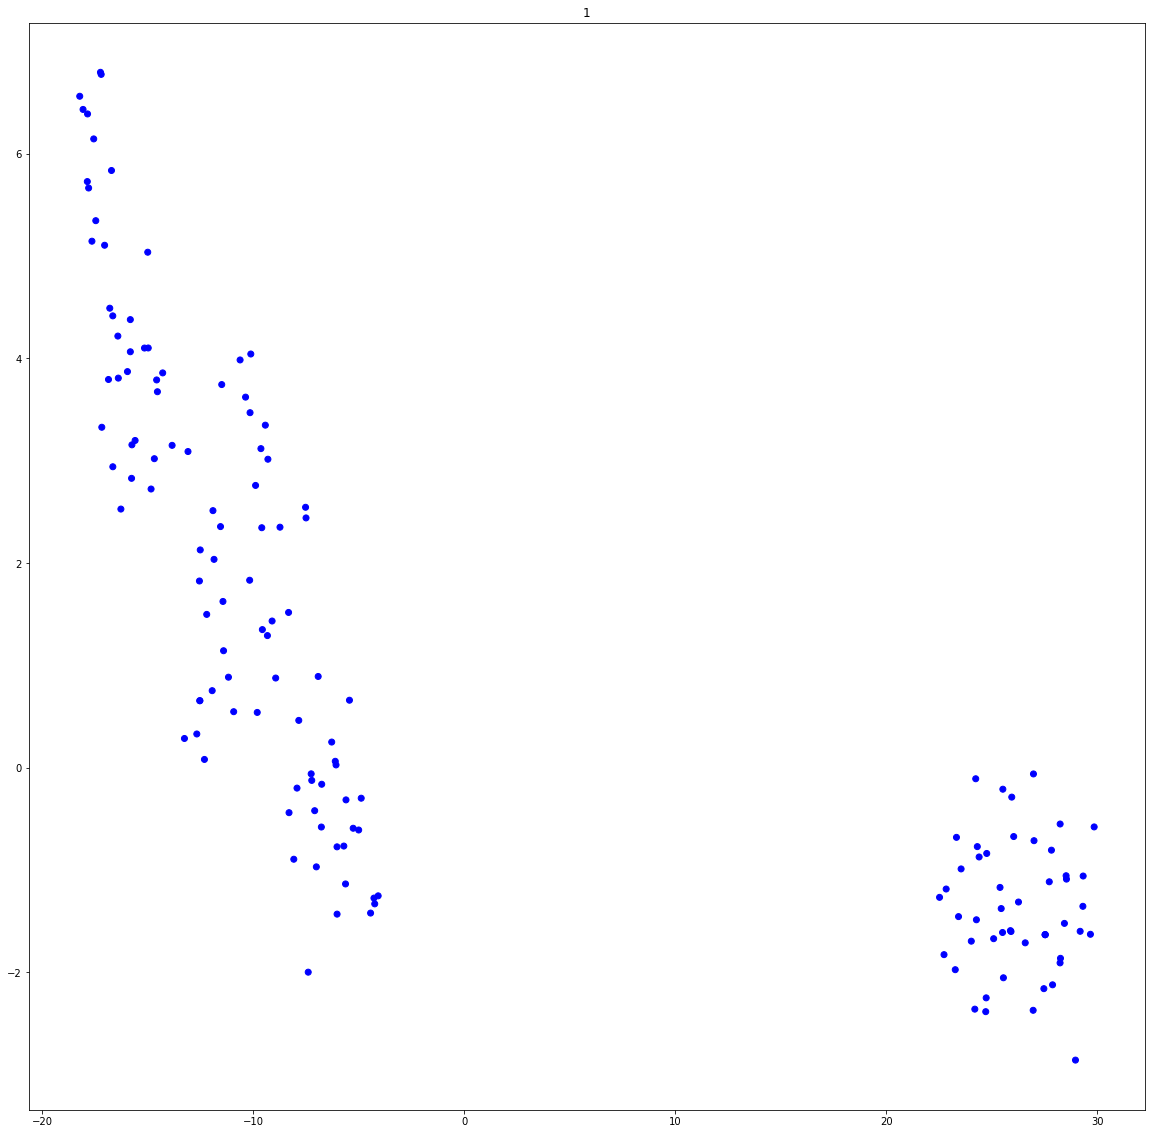

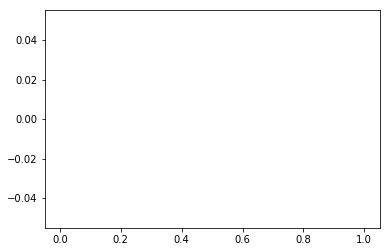

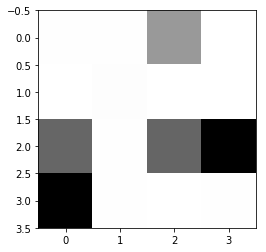

175


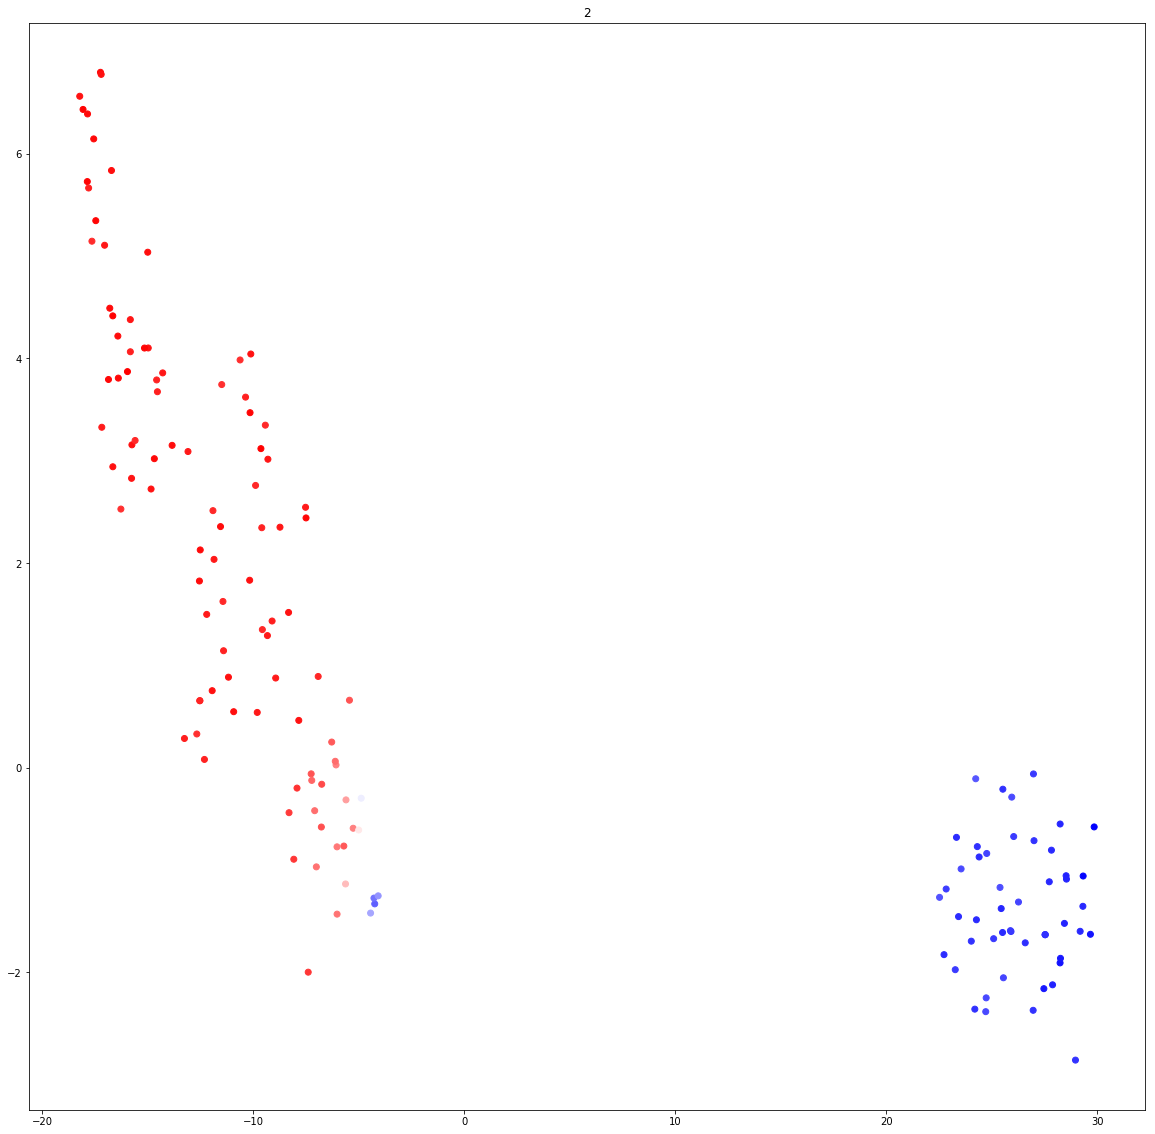

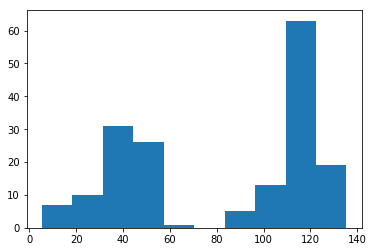

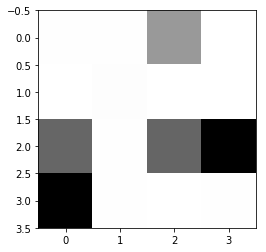

125


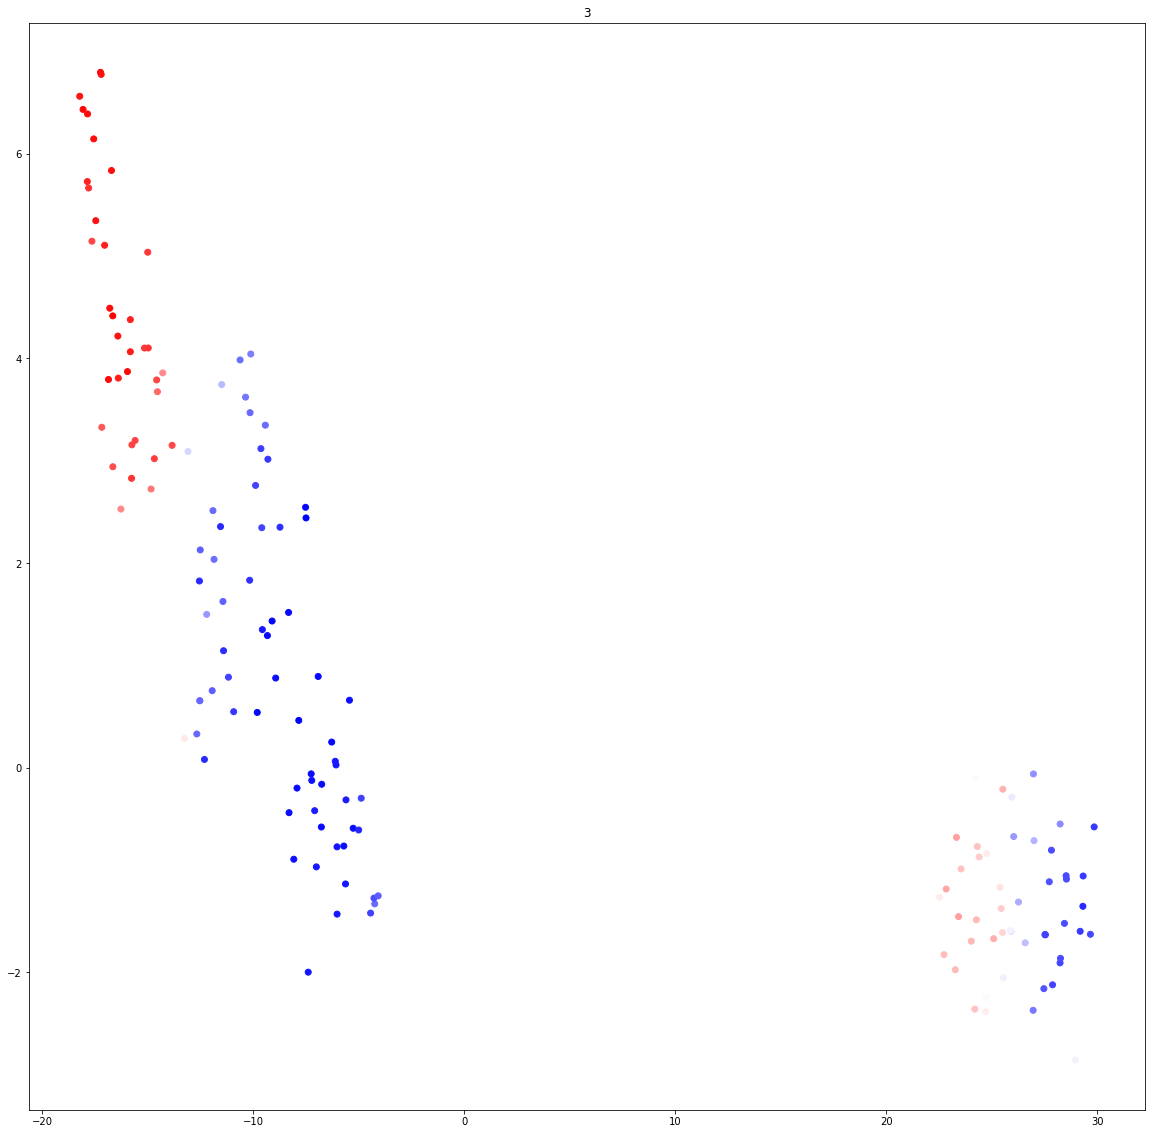

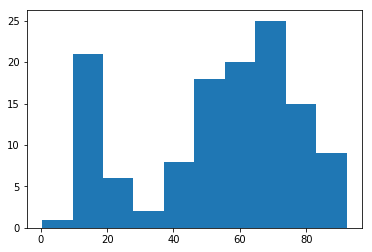

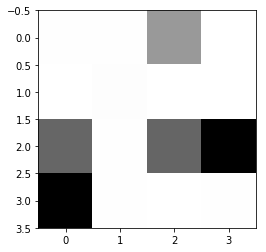

In [22]:
for i in range(20):
    braids.sample_node_slice(50)

for hidden_state in braids.hidden_states[1:]:
    print(len(hidden_state.nodes))
    plt.figure(figsize=(20,20))
    plt.title(str(hidden_state.index))
    plt.scatter(iftc[:,0],iftc[:,1],c=hidden_state.lr_finite(),cmap='bwr')
    plt.show()
    plt.figure()
    plt.hist(hidden_state.node_odds())
    plt.show()
    
    plt.figure()
    plt.imshow(braids.transition_matrix,cmap='binary')
    plt.show()
    

In [ ]:
johnston = np.loadtxt('../johnston_test')